In [1]:
import IPython
import glob
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import librosa
import sys ; sys.path.append('../')
from model.network_architecture import autoencoder
from tqdm import tqdm
from evaluacion import *


PESOS = '/home/martin/deep-dereverb/model/ckpts/aug/weights.03-0.0015.hdf5'
modelo = autoencoder()
modelo.load_weights(PESOS)

reverb_list = glob.glob('/home/martin/deep-dereverb/data/test/aug/**/*.npy', recursive=True)
clean_list =glob.glob('/home/martin/deep-dereverb/data/test/clean/**/*.npy', recursive=True)
reverb_list.sort(); clean_list.sort()

audio_in = np.load(reverb_list[-230])
audio_target = np.load(clean_list[-230])
espectro_in = gen_stft(audio_in)
espectro_target = gen_stft(audio_target)

espectro_out = modelo.predict([espectro_in.reshape(1,256,256)])
espectro_out = espectro_out.reshape(256,256)

2021-09-10 13:13:37.596501: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-09-10 13:13:39.180464: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-09-10 13:13:39.182956: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2021-09-10 13:13:39.182975: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: pc
2021-09-10 13:13:39.182980: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: pc
2021-09-10 13:13:39.183037: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.63.1
2021-09-10 13:13:39.183056: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.57.2
2021-09-10 13:13:39.1

In [2]:
audio_in= frame_to_raw(espectro_in)
audio_out = frame_to_raw(espectro_out)
audio_target = frame_to_raw(espectro_target)

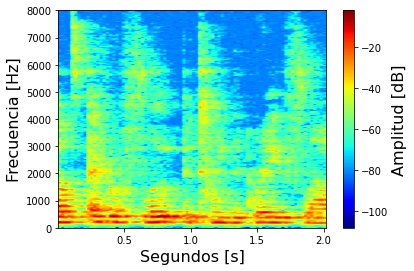

In [3]:
plt.specgram(audio_in, Fs=16000, NFFT=512, noverlap=128, mode='magnitude', cmap='jet')
cbar = plt.colorbar()
cbar.set_label('Amplitud [dB]', fontsize=16)
plt.xlabel('Segundos [s]', fontsize=16)
plt.ylabel('Frecuencia [Hz]', fontsize=16)
plt.savefig('imagenes/espectro_in.png', bbox_inches='tight')
plt.show()

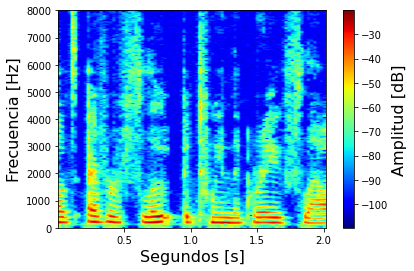

In [4]:
plt.specgram(audio_target, Fs=16000, NFFT=512, noverlap=128, mode='magnitude', cmap='jet')
cbar = plt.colorbar()
cbar.set_label('Amplitud [dB]', fontsize=16)
plt.xlabel('Segundos [s]', fontsize=16)
plt.ylabel('Frecuencia [Hz]', fontsize=16)
plt.savefig('imagenes/espectro_target.png', bbox_inches='tight')
plt.show()

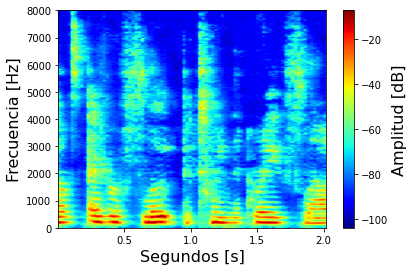

In [5]:
plt.specgram(audio_out, Fs=16000, NFFT=512, noverlap=128, mode='magnitude', cmap='jet')
cbar = plt.colorbar()
cbar.set_label('Amplitud [dB]', fontsize=16)
plt.xlabel('Segundos [s]', fontsize=16)
plt.ylabel('Frecuencia [Hz]', fontsize=16)
plt.savefig('imagenes/espectro_out.png', bbox_inches='tight')
plt.show()

In [6]:
def predict_model(data, modelo):                                                                                                             
  output = [layer.name for layer in modelo.layers]                                                                                           
  outputs = []                                                                                                                               
  output_names = []                                                                                                                          
  inputs = []                                                                                                                                
  input_names = []                                                                                                                           
  for layer in modelo.layers:                                                                                                                
      if hasattr(layer,'is_placeholder'):                                                                                                    
          inputs.append(layer.output)                                                                                                        
          input_names.append(layer.name)                                                                                                     
      elif layer.name in output:                                                                                                             
          outputs.append(layer.output)                                                                                                       
          output_names.append(layer.name)                                                                                                    
      else:                                                                                                                                  
          pass                                                                                                                               
  predict_fn = tf.keras.backend.function(inputs = inputs,outputs=outputs)                                                                    
  activations = predict_fn(data)                                                                                                             
  activations = {name: act for name, act in zip(output_names,activations)}                                                                   
  print('orden de las entradas: /\n',input_names)                                                                                            
  return activations 
PESOS = '/home/martin/deep-dereverb/model/ckpts/mezcla/weights.03-0.0022.hdf5'
modelo = autoencoder()
modelo.load_weights(PESOS)
actvs = predict_model([espectro_in.reshape(1,256,256)], modelo)

orden de las entradas: /
 ['Entrada_reverb']


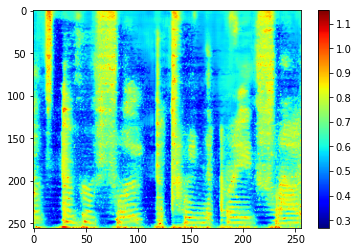

In [7]:
# Recupero la mascara
mascara = actvs['SALIDA_DEL_DECODER'][0,:,:,0]
plt.imshow(mascara[::-1,:], aspect='auto', cmap='jet')
plt.colorbar()
plt.savefig('imagenes/mascara.png')